# Simple Linear Regression Model with a Neural Network  
In this network we will create a linear regression model with NN 

In [34]:
# import libraries 
import torch 
from torch import nn 
import pandas as pd 
import matplotlib.pyplot as plt 
from tqdm import tqdm 

In [35]:
# import the data - this was created with the prior notebook.  y = 2.5M + 3 + e
fileIn = '/mnt/thumb/LLM_Stuff/data/sample_data.csv'
df = pd.read_csv(fileIn)
df.head()

,M,X,B,e,y
0,100,0,3,1647.179253,1650.179253
1,100,1,3,1987.339003,2090.339003
2,100,2,3,1215.267539,1418.267539
3,100,3,3,3608.254932,3911.254932
4,100,4,3,3589.332138,3992.332138


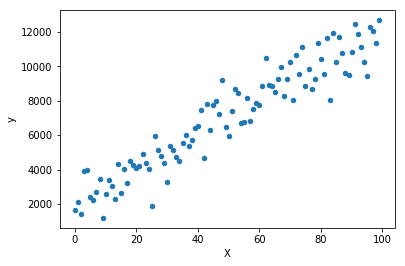

In [36]:
# plot the X,y coordinates 
df.plot.scatter('X', 'y')

In [37]:
# create the model 

class SimpleLinearRegression(nn.Module): 
    
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.tensor(1.0), requires_grad=True)
        self.bias = nn.Parameter(torch.tensor(1.0), requires_grad=True)
        self.double()
        
    def forward(self, data: torch.tensor) -> torch.Tensor:
        return self.weights * data + self.bias 
    

In [38]:
# instantiate the model 
model = SimpleLinearRegression()

In [39]:
model

SimpleLinearRegression()

In [40]:
# take a peek inside 
for name, param in model.named_parameters(): 
    print(name, param.data)

weights tensor(1., dtype=torch.float64)
bias tensor(1., dtype=torch.float64)


In [41]:
# create tensors with the data 
X = torch.tensor(df.X.to_numpy())
y = torch.tensor(df.y.to_numpy())
X.shape, y.shape


(torch.Size([100]), torch.Size([100]))

In [42]:
# Make your intial niaeve predictions (no processing has occurred) 
pred_y = model(X)

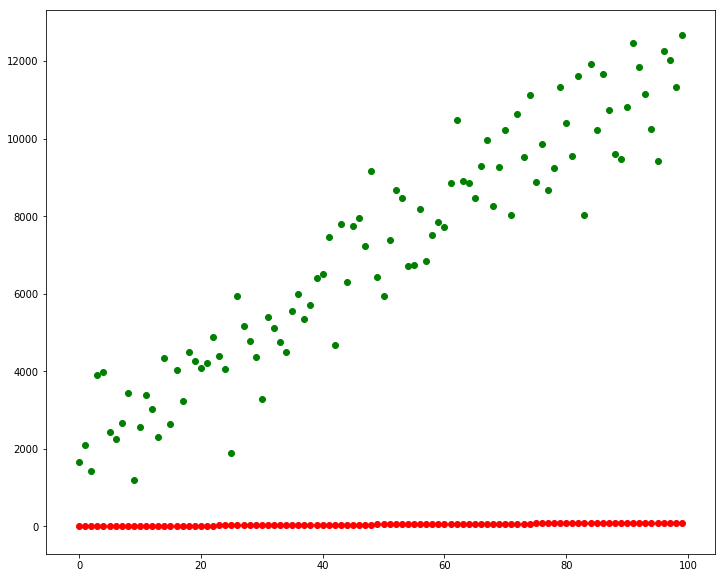

In [43]:
# plot the untrained model 
plt.figure(figsize=(12,10))
plt.scatter(X.detach().numpy(), y.detach().numpy(), color="g")
plt.scatter(X.detach().numpy(), pred_y.detach().numpy(), color="r")

## Training Section 

In [44]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [ ]:
losses = []
for i in tqdm(range(100_000)):
    pred_y = model(X)
    
    loss = loss_fn(pred_y, y)
    if i % 10000 == 0: 
        losses.append(loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()             
              

 64%|██████▍   | 63782/100000 [01:09<00:39, 908.98it/s]

## Model Evaluation 

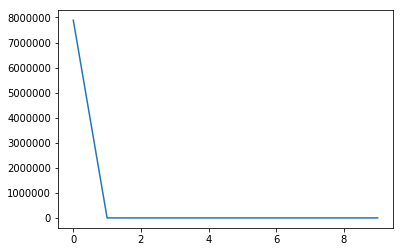

In [31]:
# Plot your losses 
plt.plot(losses)

## Evaluate Predictions 

In [32]:
# look at current weights 
for name, param in model.named_parameters(): 
    print(name, param.data)

weights tensor(49.9951, dtype=torch.float64)
bias tensor(2.2511, dtype=torch.float64)


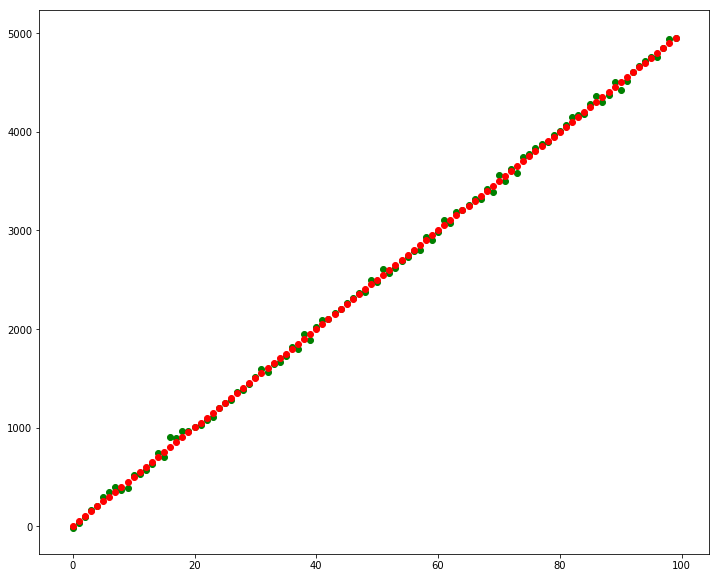

In [33]:
# Plot the trained model
plt.figure(figsize=(12,10))
plt.scatter(X.detach().numpy(), y.detach().numpy(), color="g")
plt.scatter(X.detach().numpy(), pred_y.detach().numpy(), color="r")